# Loading Image and mask

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import seaborn

#Original Image
org_image = nib.load('fetus_07.nii').get_data()
print("Matrix shape Original Image:"+str(org_image.shape))

#Manual Mask
mask_image = nib.load('Net_maskfetus_07.nii').get_data()
print("Matrix shape Mask Image:" + str(mask_image.shape))



Matrix shape Original Image:(256, 256, 52)
Matrix shape Mask Image:(256, 256, 52)


# Display one slice of Original and its respective mask

Text(0.5,1,u'Mask Image of slice #: 26')

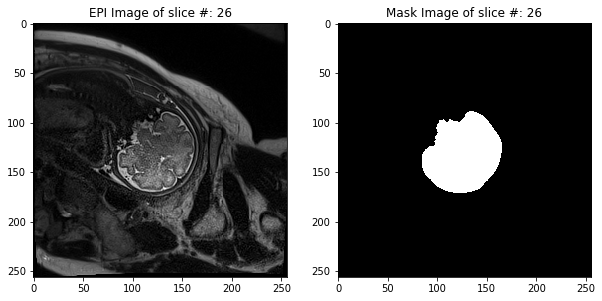

In [19]:
slice_number=int(round((org_image[:].shape[2])/2,0)) # Get the middle slice

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))                       
ax1.imshow(np.array(org_image[:, :, slice_number]), interpolation='nearest', cmap='gray')
ax1.set_title('EPI Image of slice #: ' + str(slice_number))
ax2.imshow(mask_image[:, :, slice_number], interpolation='nearest', cmap='gray')
ax2.set_title('Mask Image of slice #: ' + str(slice_number))

# Extracting feature vectors

In [20]:
org_image_2d = org_image.reshape(np.prod(org_image.shape[:-1]), org_image.shape[-1])
print("Shape of the feature: "+str(org_image_2d.shape))

Shape of the feature: (65536, 52)


# Converting brain mask to binary

In [21]:
print("Data type before:" + str(mask_image.dtype))
mask_image = mask_image.astype(bool) #Convert the mask_image data type from float to boolean
mask_image_neg = np.invert(mask_image)
print("Data type after:" + str(mask_image.dtype))
brain_image = org_image[mask_image]
brain_image_neg = org_image[mask_image_neg]
print("Number of brain pixels: "+str(brain_image.shape))
print("Number of non-brain pixels: "+str(brain_image_neg.shape))


Data type before:float64
Data type after:bool
Number of brain pixels: (161929,)
Number of non-brain pixels: (3245943,)


# Unmask and create image from features

In [22]:
unmasked_data = np.zeros(mask_image.shape, dtype=brain_image.dtype)
unmasked_data[mask_image] = brain_image

unmasked_data_neg = np.zeros(mask_image_neg.shape, dtype=brain_image_neg.dtype)
unmasked_data_neg[mask_image_neg] = brain_image_neg

# Image of extracted Brain

Text(0.5,1,u'EPI Image of slice #: 26')

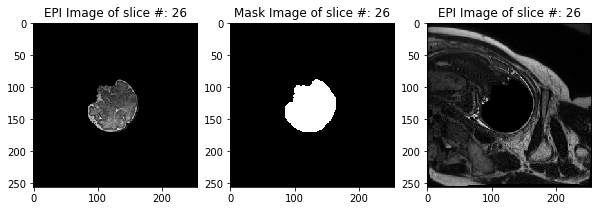

In [23]:
slice_number=int(round((org_image[:].shape[2])/2,0)) # Get the middle slice

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5))     
ax1.imshow(np.array(unmasked_data[:, :, slice_number]), interpolation='nearest', cmap='gray')
ax1.set_title('EPI Image of slice #: ' + str(slice_number))
ax2.imshow(mask_image[:, :, slice_number], interpolation='nearest', cmap='gray')
ax2.set_title('Mask Image of slice #: ' + str(slice_number))

ax3.imshow(np.array(unmasked_data_neg[:, :, slice_number]), interpolation='nearest', cmap='gray')
ax3.set_title('EPI Image of slice #: ' + str(slice_number))


# Play with simple matrix

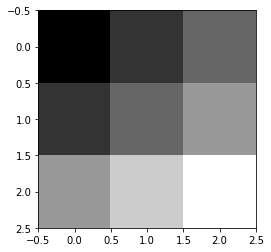

(3, 3)
(3, 3, 3)


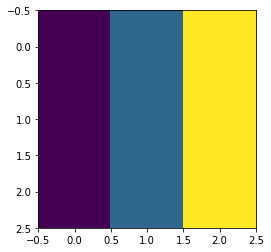

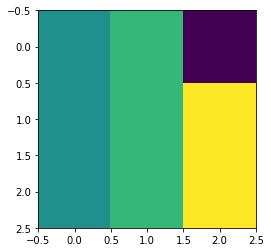

In [14]:
d2=np.array([[1,2,3],[2,3,4],[4,5,6]])
plt.imshow(d2, cmap='gray')
plt.show()
print(d2.shape)

d3=np.array([[[1,2,3],[2,3,4],[4,5,0]],
            [[1,2,3],[2,3,4],[4,5,6]],
             [[1,2,3],[2,3,4],[4,5,6]]])
print(d3.shape)
plt.imshow(d3[:,:,0])
plt.show()
plt.imshow(d3[:,:,2])

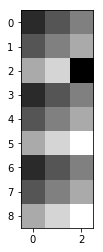

In [15]:
org_image_2d = d3.reshape(np.prod(d3.shape[:-1]), d3.shape[-1])
plt.imshow(org_image_2d,cmap='gray')

In [16]:
mask=np.array([[[0,0,0],[1,1,1],[0,0,0]],
            [[1,1,1],[1,1,1],[1,1,1]],
             [[0,0,0],[1,1,1],[0,0,0]]])

mask=mask.astype(bool)
brain=d3[mask]

In [17]:
len(brain)

15